In [1]:
## KERAS CLASSIFICATION
Tumour classification

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
cd 'Courses/Python4DataScience/Refactored_Py_DS_ML_Bootcamp-master/22-Deep-Learning/TensorFlow_FILES/DATA/'

[Errno 2] No such file or directory: 'Courses/Python4DataScience/Refactored_Py_DS_ML_Bootcamp-master/22-Deep-Learning/TensorFlow_FILES/DATA/'
/Users/andreabocincova/Desktop/Courses/Python4DataScience/Refactored_Py_DS_ML_Bootcamp-master/22-Deep-Learning/TensorFlow_FILES


In [13]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [15]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


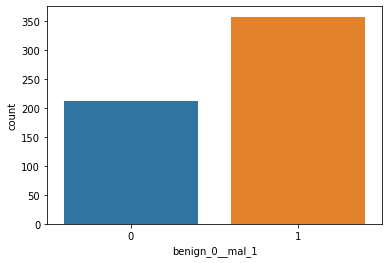

In [19]:
sns.countplot(x='benign_0__mal_1',data=df)

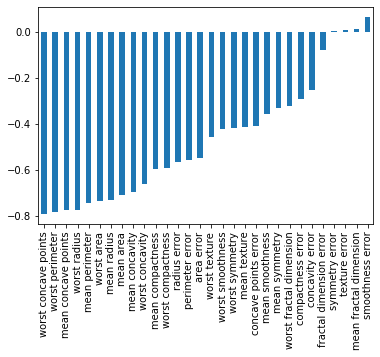

In [24]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

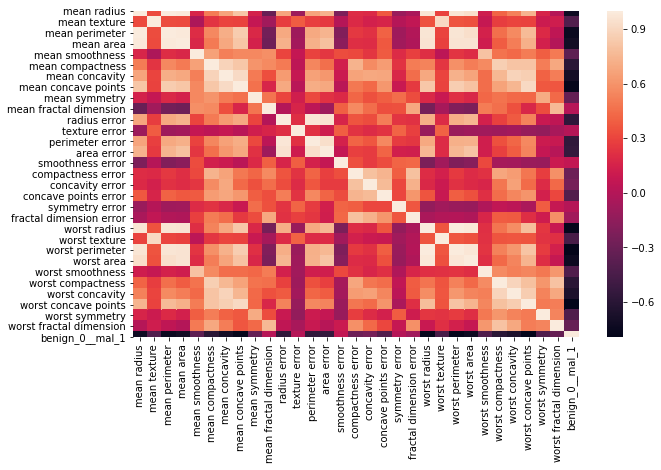

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [ ]:
# PREPROCESSING

In [29]:
# split into labels and features
X = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# MODEL

In [41]:
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import Dense,Dropout

In [43]:
X_train.shape

(426, 30)

In [45]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid')) # binary classification

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [47]:
model.fit(x = X_train, y = y_train, epochs = 600,validation_data= (X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 60ms/step - loss: 0.6957 - val_loss: 0.6381
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6276 - val_loss: 0.5986
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5899 - val_loss: 0.5491
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5467 - val_loss: 0.5021
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5000 - val_loss: 0.4566
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4398 - val_loss: 0.4060
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4145 - val_loss: 0.3629
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3580 - val_loss: 0.3212
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3125 - val_loss: 0.2877
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2971 - val_loss: 0.2627
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0422 - val_loss: 0.1164
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0450 - val_loss: 0.1164
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0414 - val_loss: 0.1134
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0415 - val_loss: 0.1182
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.1204
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.1176
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0368 - val_loss: 0.1301
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0396 - val_loss: 0.1120
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1200
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0435 - val_loss: 0.1142


14/14 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.1455
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0309 - val_loss: 0.1399
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0353 - val_loss: 0.1343
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.1349
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.1453
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0356 - val_loss: 0.1558
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.1337
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0340 - val_loss: 0.1504
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.1322
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0296 - val_loss: 0.1452
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.1676
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.1629
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.1562
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.1659
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0197 - val_loss: 0.1668
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.1662
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.1654
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.1798
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0216 - val_loss: 0.1573
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.1844
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.1912
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.2044
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.1816
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.1949
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1901
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.2054
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.1818
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.2057
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.2045
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.2217
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.2106
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.2214
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.2198
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.2069
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.2295
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.2095
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.2311
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.2067
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.2455
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.2054
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.2318
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.3043
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.2236
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.2926
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.2296
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.2592
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.2296
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.2560
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.2467
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.2516
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.2691
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.2845
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.2842
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.2730
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.2952
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.2720
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.2887
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.2713
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.2885
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.2924
Epoc

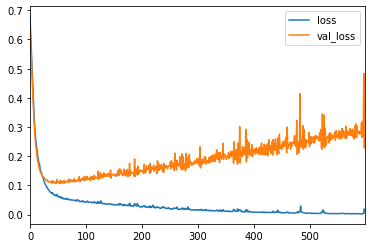

In [53]:
losses = pd.DataFrame(model.history.history)
losses.plot() # overfitted!!!!

In [54]:
# early stopping to prevent overfitting
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid')) # binary classification

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [59]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [60]:
model.fit(x = X_train, y = y_train, epochs = 600,validation_data= (X_test,y_test),callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6853 - val_loss: 0.6603
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6579 - val_loss: 0.6249
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6145 - val_loss: 0.5843
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5667 - val_loss: 0.5390
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5260 - val_loss: 0.4923
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4659 - val_loss: 0.4386
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4279 - val_loss: 0.3864
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3623 - val_loss: 0.3370
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3473 - val_loss: 0.2943
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3010 - val_loss: 0.2669
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.1027
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.1124
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0690 - val_loss: 0.1076
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1074
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.1093
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.1050
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0420 - val_loss: 0.1081
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0356 - val_loss: 0.1057
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0498 - val_loss: 0.1119
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.1039
Epoch 93/600


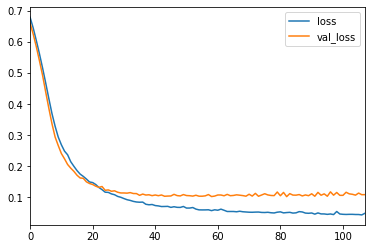

In [61]:
losses = pd.DataFrame(model.history.history)
losses.plot() # much better

In [67]:
# ADD IN DROPOUT LAYERS

# early stopping to prevent overfitting
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(.5)) # half neurons in this layer will be turned off after one batch

model.add(Dense(15,activation = 'relu'))
model.add(Dropout(.5)) # half neurons in this layer will be turned off after one batch
          
model.add(Dense(1,activation = 'sigmoid')) # binary classification

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [68]:
model.fit(x = X_train, y = y_train, epochs = 600,validation_data= (X_test,y_test),callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7428 - val_loss: 0.6711
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6771 - val_loss: 0.6357
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6695 - val_loss: 0.6064
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6443 - val_loss: 0.5799
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5869 - val_loss: 0.5526
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6119 - val_loss: 0.5317
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5462 - val_loss: 0.5085
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5252 - val_loss: 0.4860
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5014 - val_loss: 0.4625
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4921 - val_loss: 0.4412
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1111 - val_loss: 0.1072
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.0949
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1321 - val_loss: 0.0928
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1128 - val_loss: 0.0971
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1273 - val_loss: 0.1001
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1196 - val_loss: 0.0973
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0910 - val_loss: 0.0991
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1218 - val_loss: 0.1075
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1148 - val_loss: 0.0987
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0925 - val_loss: 0.1003
Epoch 93/600


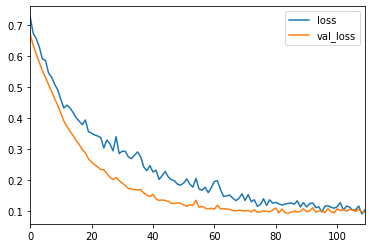

In [69]:
losses = pd.DataFrame(model.history.history)
losses.plot() # almost perfect

In [72]:
# PREDICT CLASSES

predictions = model.predict(X_test)>.5
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.99      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [74]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 0 88]]
